In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [8]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [14]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\arafa\AppData\Local\Temp\ipykernel_8220\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [18]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\arafa\AppData\Local\Temp\ipykernel_8220\1549918373.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


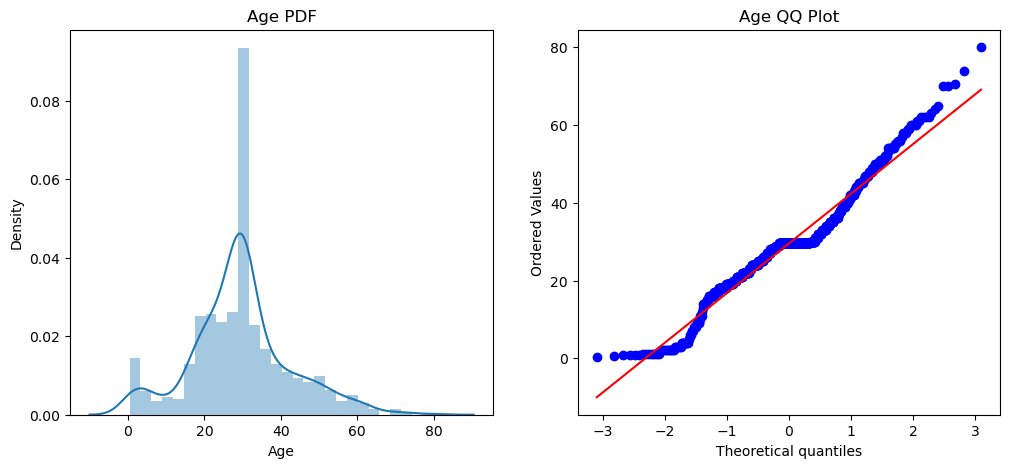

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\arafa\AppData\Local\Temp\ipykernel_8220\3380215880.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


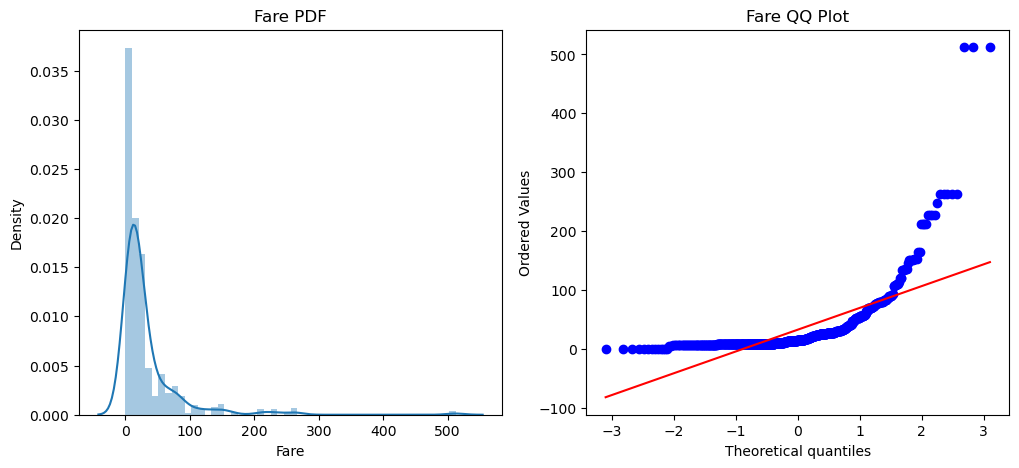

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [32]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [36]:
clf.fit(x_train,y_train)
clf1.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf1.predict(x_test)

print('Accuracy Score LR',accuracy_score(y_test,y_pred))
print('Accuracy Score DT',accuracy_score(y_test,y_pred1))

Accuracy Score LR 0.6480446927374302
Accuracy Score DT 0.6927374301675978


In [38]:
trnf = FunctionTransformer(func=np.log1p)

In [40]:
x_train_transformed = trnf.fit_transform(x_train)
x_test_transformed = trnf.transform(x_test)

In [42]:
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()

clf2.fit(x_train_transformed,y_train)
clf3.fit(x_train_transformed,y_train)

y_pred2 = clf2.predict(x_test_transformed)
y_pred3 = clf3.predict(x_test_transformed)
        

print('After log Transform LR',accuracy_score(y_test,y_pred2))
print('After log Transform DT',accuracy_score(y_test,y_pred3))

After log Transform LR 0.6815642458100558
After log Transform DT 0.6815642458100558


In [44]:
X_transformed = trnf.fit_transform(X)

clf4 = LogisticRegression()
clf5 = DecisionTreeClassifier()

print('LR',np.mean(cross_val_score(clf4,X_transformed,y,scoring='accuracy',cv=10)))
print('LR',np.mean(cross_val_score(clf5,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
LR 0.6622097378277154


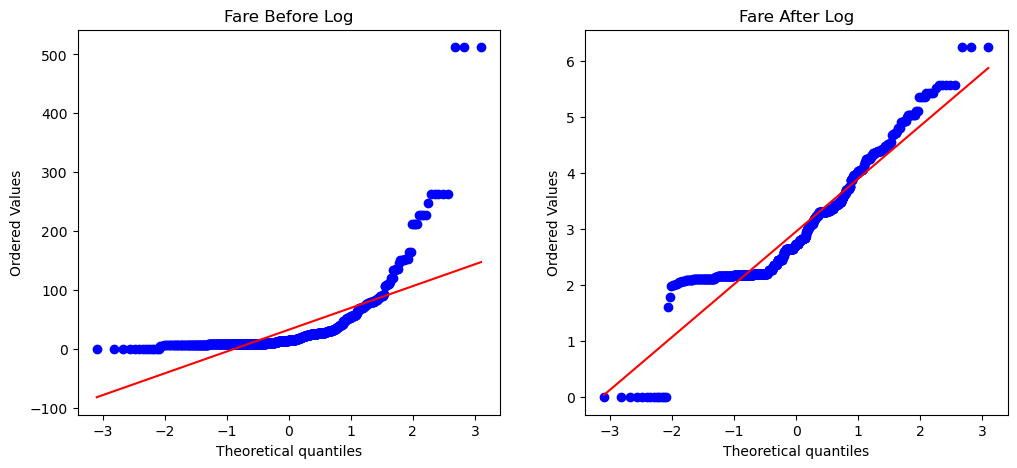

In [46]:
plt.figure(figsize=(12,5))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare After Log')

plt.show()

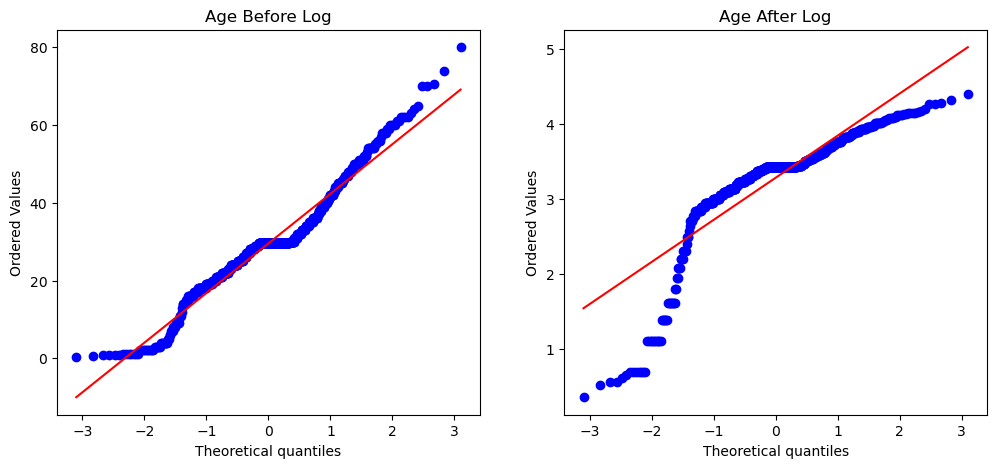

In [48]:
plt.figure(figsize=(12,5))

plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age After Log')

plt.show()

In [50]:
trnf2 = ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

x_train_transformed2 = trnf2.fit_transform(x_train)
x_test_transformed2  = trnf2.transform(x_test)

In [52]:
clf6 = LogisticRegression()
clf7 = DecisionTreeClassifier()

clf6.fit(x_train_transformed2,y_train)
clf7.fit(x_train_transformed2,y_train)

y_pred6 = clf6.predict(x_test_transformed2)
y_pred7 = clf7.predict(x_test_transformed2)

print('Just Fare transformed LR',accuracy_score(y_test,y_pred6))
print('Just Fare transformed DT',accuracy_score(y_test,y_pred7))

Just Fare transformed LR 0.6703910614525139
Just Fare transformed DT 0.6927374301675978


In [56]:
X_transformed2 = trnf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6678277153558052


In [72]:
def apply_transform(transform):
    X = df[:,1:3]
    y = df[:,0]

    trnf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    X_trans = trnf.fit_transform(X)
    clf = LogisticRegression()
    print('Accuracy',np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    stats.probplot(X['Fare'],dist='norm',plot=plt)
    plt.title('Fare Before Transform')
    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist='norm',plot=plt)
    plt.title('Fare After Transform')
    plt.show()

In [78]:


def apply_transform(df, transform):
    """
    Apply a transformation to the 'Fare' column of the input DataFrame and visualize the transformation.

    Args:
    df (pandas DataFrame): The input DataFrame.
    transform (function): The transformation function to be applied.

    Returns:
    None
    """
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    column_transformer = ColumnTransformer(
        [('log', FunctionTransformer(transform), ['Fare'])],
        remainder='passthrough'
    )
    X_transformed = column_transformer.fit_transform(X)
    
    classifier = LogisticRegression()
    accuracy = np.mean(cross_val_score(classifier, X_transformed, y, scoring='accuracy', cv=10))

    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transform')
    plt.subplot(122)
    stats.probplot(X_transformed[:, 0], dist='norm', plot=plt)
    plt.title('Fare After Transform')
    plt.show()

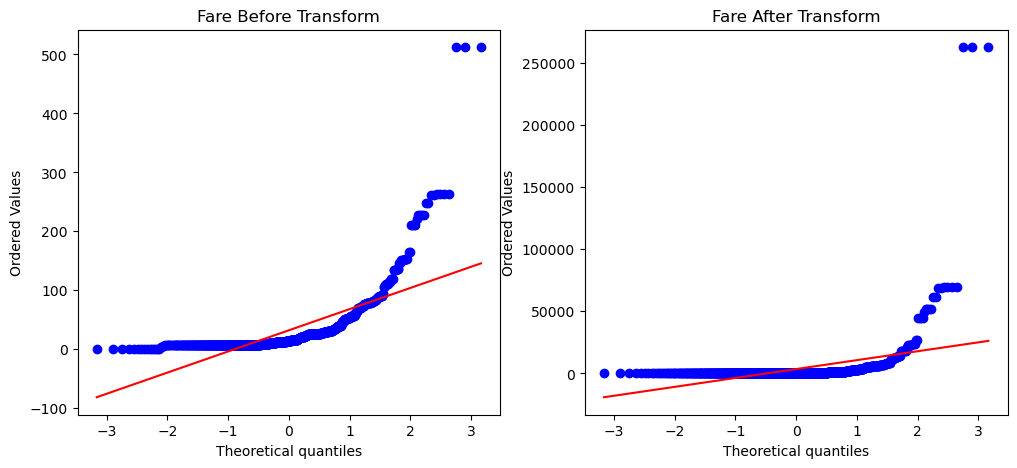

In [82]:
apply_transform(df,lambda x: x**2 )